<a href="https://www.kaggle.com/code/okolinnamdinnaemeka/e-commerce-sales-analysis?scriptVersionId=149872201" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/Cloud Warehouse Compersion Chart.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/May-2022.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/P  L March 2021.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/International sale Report.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/Expense IIGF.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/Sale Report.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data = pd.read_csv('/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv')
amzn_data = data.copy()
amzn_data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
amzn_data.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [5]:
amzn_data= amzn_data.fillna(method = 'bfill', axis=0) # filling the null values
amzn_data.isnull().sum()

index                  0
Order ID               0
Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
ship-service-level     0
Style                  0
SKU                    0
Category               0
Size                   0
ASIN                   0
Courier Status         0
Qty                    0
currency               0
Amount                 0
ship-city              0
ship-state             0
ship-postal-code       0
ship-country           0
promotion-ids          0
B2B                    0
fulfilled-by          83
Unnamed: 22            0
dtype: int64

Analyzing Monthly sales

In [6]:
amzn_data.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22              bool
dtype: object

In [7]:
amzn_data['Date'][0].split('-')[0] # getting the month from the date

'04'

In [8]:
def return_month(x):
    return x.split('-')[0]

amzn_data['Month'] = amzn_data['Date'].apply(return_month)
amzn_data['Month'] = amzn_data['Month'].astype(int)
print(amzn_data.dtypes)

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22              bool
Month                   int64
dtype: object


In [9]:
amzn_data['sales'] = amzn_data['Amount'] * amzn_data['Qty']
amzn_data.groupby(['Month'])['sales'].sum()

Month
3       98261.00
4    27920437.65
5    25354201.48
6    22785109.00
Name: sales, dtype: float64

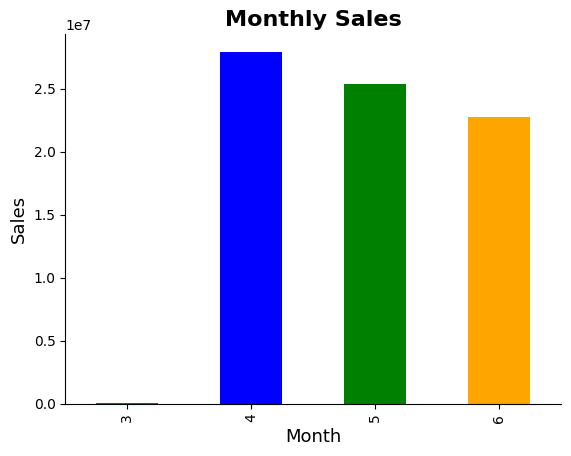

In [10]:
amzn_data.groupby(['Month'])['sales'].sum().plot(kind = 'bar', color = ["red","blue","green","orange"])
plt.title('Monthly Sales' , fontsize = 16, fontweight = "bold")
plt.ylabel("Sales", fontsize = 13)
plt.xlabel('Month' , fontsize = 13)
sns.despine()
plt.show()

City with maximum order

In [11]:
amzn_data.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Month,sales
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,MUMBAI,MAHARASHTRA,400081.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,4,0.0
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,4,406.0


In [12]:
print(pd.value_counts(amzn_data['ship-city'])[0:10])

ship-city
BENGALURU    11221
HYDERABAD     8076
MUMBAI        6126
NEW DELHI     5798
CHENNAI       5421
PUNE          3858
KOLKATA       2382
GURUGRAM      1868
THANE         1704
LUCKNOW       1458
Name: count, dtype: int64


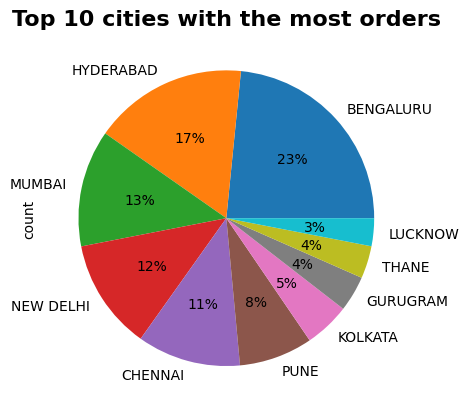

In [13]:
pd.value_counts(amzn_data['ship-city'])[0:10].plot(kind = 'pie' , autopct = '%1.0f%%')
plt.title('Top 10 cities with the most orders' , fontsize = 16, fontweight = "bold")
plt.show()

Product sold most

In [14]:
total_df = amzn_data.groupby(['Category']).agg({'Qty' : 'sum' , 'Amount' : 'mean'})
total_df = total_df.reset_index()
total_df

,Category,Qty,Amount
0,Blouse,863,524.248629
1,Bottom,398,368.597682
2,Dupatta,3,305.000000
3,Ethnic Dress,1053,718.650147
4,Saree,152,789.815610
5,Set,45289,821.957488
6,Top,9903,531.052184
7,Western Dress,13943,757.707607
8,kurta,45045,467.502352


In [15]:
products =total_df['Category'].values

<Figure size 1000x800 with 0 Axes>

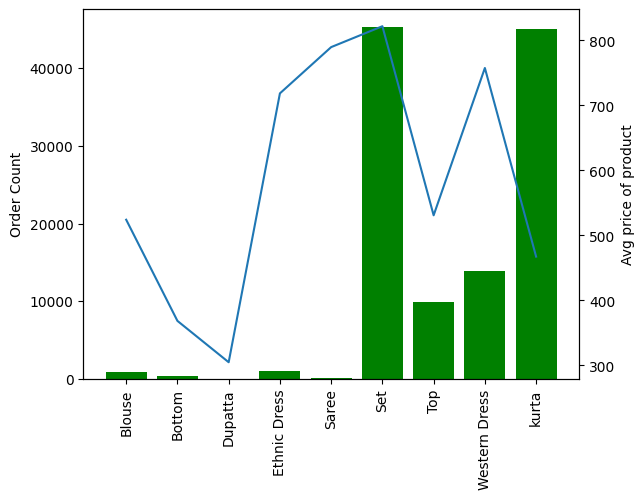

In [16]:
plt.figure(figsize = (10, 8))

fig , ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(total_df['Category'] , total_df['Qty'], color = 'g')
ax2.plot(total_df['Category'] , total_df['Amount']) 
ax1.set_xticklabels(products , rotation = 'vertical')

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product')
plt.show()

Trend of most sold product

In [17]:
amzn_data['Category'].value_counts().index

Index(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Blouse',
       'Bottom', 'Saree', 'Dupatta'],
      dtype='object', name='Category')

In [18]:
most_sold_category = amzn_data['Category'].value_counts().index
most_sold_category_df = amzn_data[amzn_data['Category'].isin(most_sold_category)]
most_sold_category_df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Month,sales
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,MUMBAI,MAHARASHTRA,400081.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,4,0.0
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False,4,406.0
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Easy Ship,False,4,329.0
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,PUDUCHERRY,PUDUCHERRY,605008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False,4,0.0
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,CHENNAI,TAMIL NADU,600073.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False,4,574.0


In [19]:
most_sold_category_df.groupby(['Month' , 'Category']).size()
pivot= most_sold_category_df.groupby(['Month' , 'Category']).size().unstack()
pivot

Category,Blouse,Bottom,Dupatta,Ethnic Dress,Saree,Set,Top,Western Dress,kurta
Month,,,,,,,,,
3,1.0,NaN,NaN,1.0,NaN,75.0,9.0,9.0,76.0
4,418.0,180.0,NaN,351.0,75.0,20204.0,3928.0,4164.0,19747.0
5,323.0,150.0,NaN,451.0,53.0,16016.0,4055.0,6059.0,14933.0
6,184.0,110.0,3.0,356.0,36.0,13989.0,2630.0,5268.0,15121.0


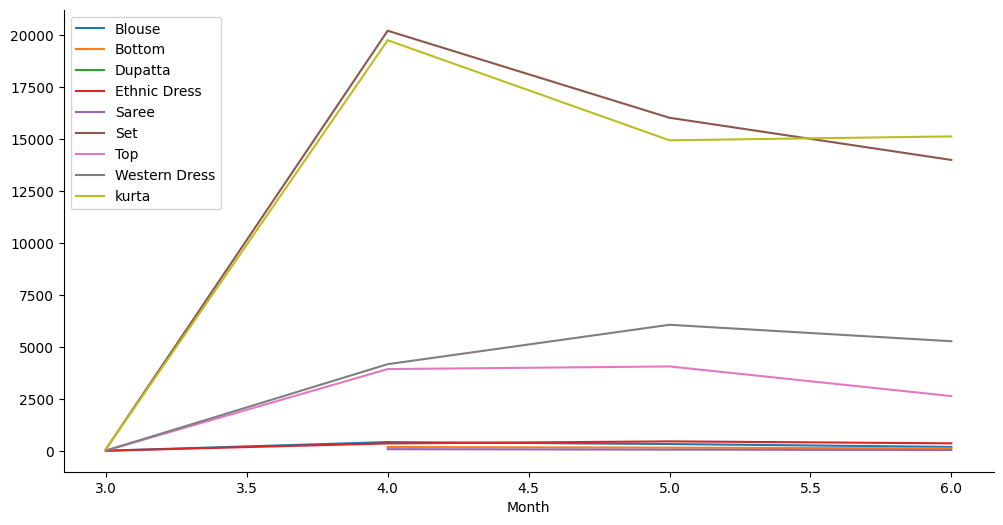

In [20]:
pivot.plot(figsize = (12,6))
plt.legend(loc = "upper left" )
sns.despine()
plt.show()

Products most often sold together

In [21]:
df_duplicated = amzn_data[amzn_data['Order ID'].duplicated(keep = False)]
df_duplicated.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Month,sales
37,37,403-4367956-2849158,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3787,JNE3787-KR-S,kurta,...,NEW DELHI,DELHI,110092.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False,4,487.0
38,38,403-4367956-2849158,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3543,JNE3543-KR-S,kurta,...,NEW DELHI,DELHI,110092.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False,4,368.0


In [22]:
dup_products = df_duplicated.groupby(['Order ID'])['Category'].apply(lambda x : ','.join(x)).reset_index().rename(columns = {'Category' : 'grouped_products'})
dup_products

,Order ID,grouped_products
0,171-0012693-2893106,"Set,Set"
1,171-0014231-7760344,"Set,Set"
2,171-0015435-1981904,"kurta,kurta"
3,171-0019960-6156301,"Set,Set"
4,171-0031114-0715560,"kurta,kurta"
...,...,...
6841,408-9927031-2905104,"kurta,kurta"
6842,408-9928007-3246733,"kurta,kurta"
6843,408-9929975-2118741,"Set,Set"
6844,408-9951521-7399501,"Western Dress,Western Dress"


In [23]:
products_df = df_duplicated.merge(dup_products , how = 'left' , on = 'Order ID')
products_df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Month,sales,grouped_products
0,37,403-4367956-2849158,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3787,JNE3787-KR-S,kurta,...,DELHI,110092.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False,4,487.0,"kurta,kurta"
1,38,403-4367956-2849158,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3543,JNE3543-KR-S,kurta,...,DELHI,110092.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False,4,368.0,"kurta,kurta"
2,61,404-2262140-4696366,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE2270,JNE2270-KR-487-A-M,kurta,...,MAHARASHTRA,440022.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False,4,518.0,"kurta,kurta"
3,62,404-2262140-4696366,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3579,JNE3579-KR-M,kurta,...,MAHARASHTRA,440022.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False,4,295.0,"kurta,kurta"
4,79,408-4069830-3819562,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET288,SET288-KR-NP-XXXL,Set,...,WEST BENGAL,700048.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False,4,684.0,"Set,Set,Set"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,128930,407-8519205-5064368,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET324,SET324-KR-NP-XL,Set,...,ANDHRA PRADESH,520010.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,5,635.0,"Set,Set"
15439,128941,403-3035549-4142738,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0118,J0118-TP-XXL,Top,...,KARNATAKA,560102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,5,529.0,"Top,Top"
15440,128942,403-3035549-4142738,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-XXL,Top,...,KARNATAKA,560102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,5,518.0,"Top,Top"
15441,128952,404-8878574-4524358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3721,JNE3721-KR-M,kurta,...,WEST BENGAL,712249.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,5,301.0,"kurta,kurta"


In [24]:
no_dub_df= products_df.drop_duplicates(subset=['Order ID'])
no_dub_df.shape

(6846, 27)

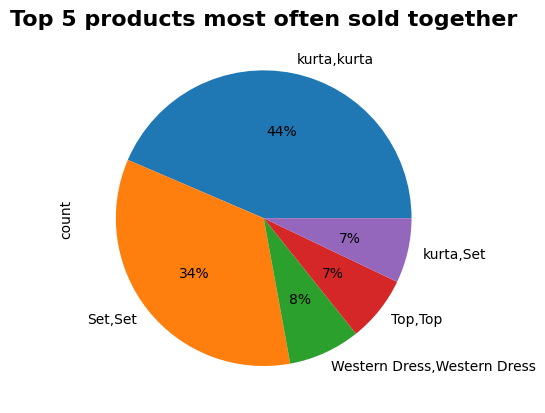

In [25]:
no_dub_df['grouped_products'].value_counts()[0:5].plot.pie(autopct = '%1.0f%%')
plt.title('Top 5 products most often sold together' , fontsize = 16, fontweight = "bold")
plt.show()